In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KnneigborsRegressor

In [3]:
data = pd.read_csv("profit_data.csv")

In [4]:
data

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [8]:
data.tail()

,Marketing Spend,Administration,Transport,Area,Profit
45,1000.23,124153.04,1903.93,Dhaka,64926.08
46,1315.46,115816.21,297114.46,Rangpur,49490.75
47,0.00,135426.92,0.00,Ctg,42559.73
48,542.05,51743.15,0.00,Dhaka,35673.41
49,0.00,116983.80,45173.06,Ctg,14681.40


In [10]:
data.dtypes

Marketing Spend    float64
Administration     float64
Transport          float64
Area                object
Profit             float64
dtype: object

In [11]:
data.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [12]:
data.isna().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [13]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [15]:
data[data["Administration"]>10000]

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [18]:
specific_columns = ["Dhaka"]
data[data["Area"].isin(specific_columns)]

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
3,144372.41,118671.85,383199.62,Dhaka,182901.99
5,131876.90,99814.71,362861.36,Dhaka,156991.12
8,120542.52,148718.95,311613.29,Dhaka,152211.77
15,165349.20,122616.84,261776.23,Dhaka,129917.04
17,94657.16,145077.58,282574.31,Dhaka,125370.37
19,86419.70,153514.11,0.00,Dhaka,122776.86
21,78389.47,153773.43,299737.29,Dhaka,111313.02
24,77044.01,99281.34,140574.81,Dhaka,108552.04
27,72107.60,127864.55,353183.81,Dhaka,105008.31


In [30]:
data["Transport"].var()

np.float64(14954920097.423788)

In [31]:
data.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


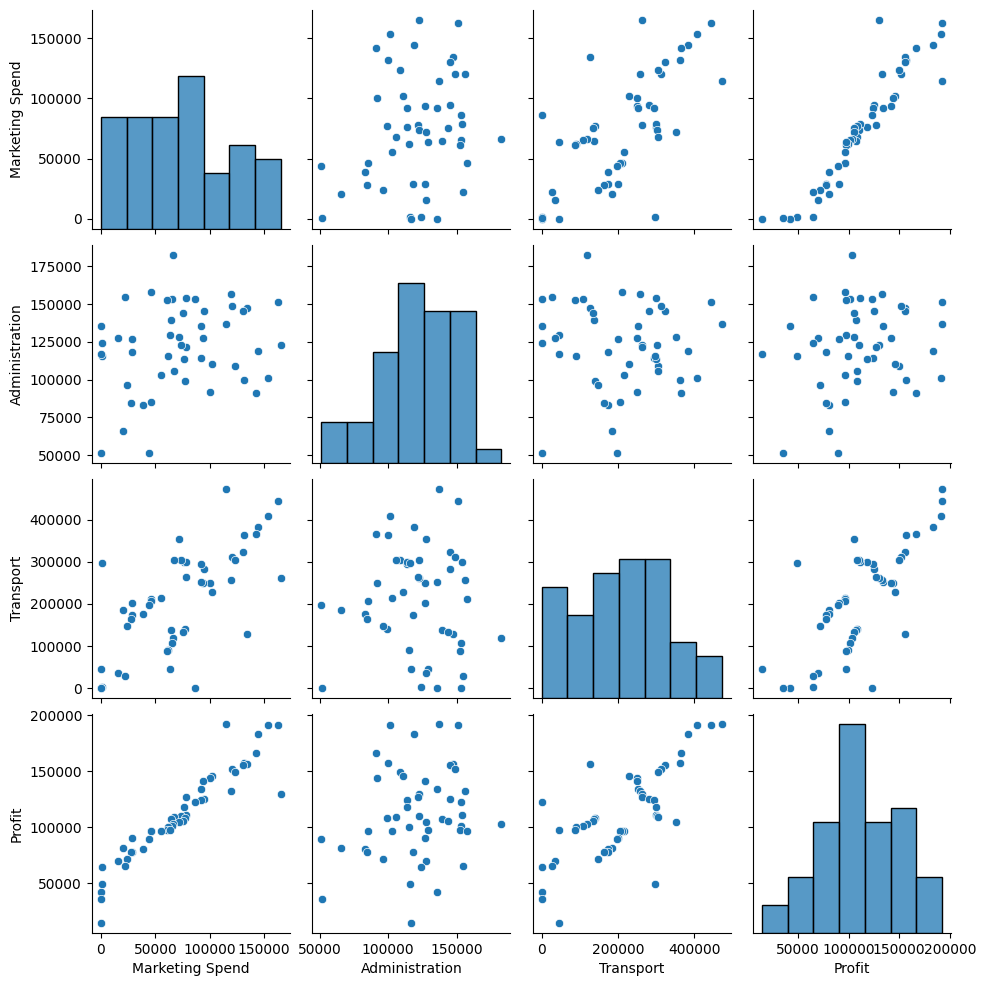

In [32]:
sns.pairplot(data)

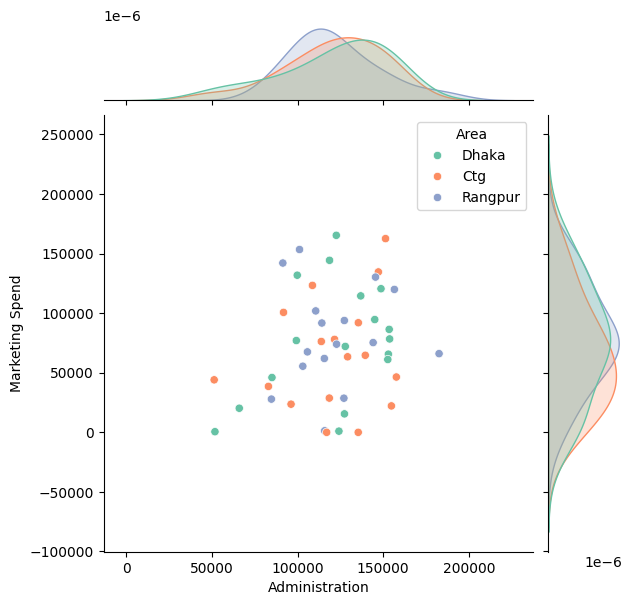

In [36]:
sns.jointplot(data = data, x = "Administration", y = "Marketing Spend", kind = "scatter", hue = "Area", palette = "Set2")

<Axes: xlabel='Area', ylabel='count'>

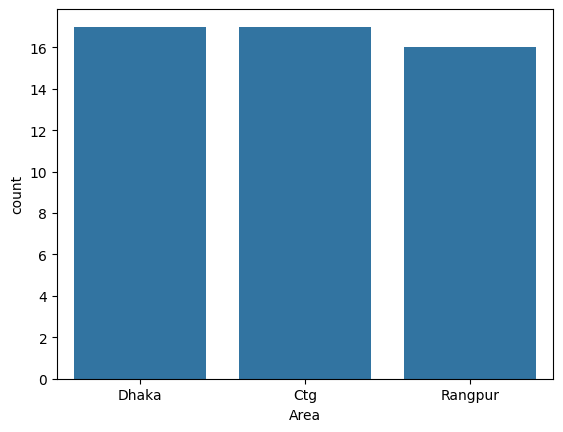

In [38]:
sns.countplot(data = data, x ="Area" )

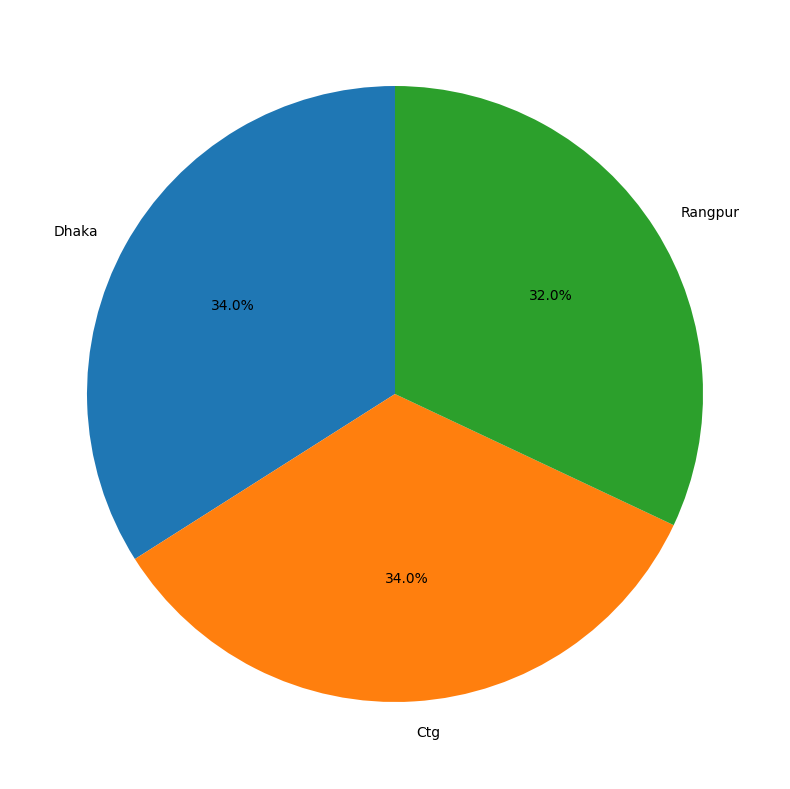

In [40]:
Count_of_Area = data["Area"].value_counts()
plt.figure(figsize = [8,12])
plt.pie(Count_of_Area, labels = Count_of_Area.index, autopct = "%1.1f%%", startangle = 90)
plt.tight_layout()
plt.show()

<Axes: xlabel='Transport', ylabel='Area'>

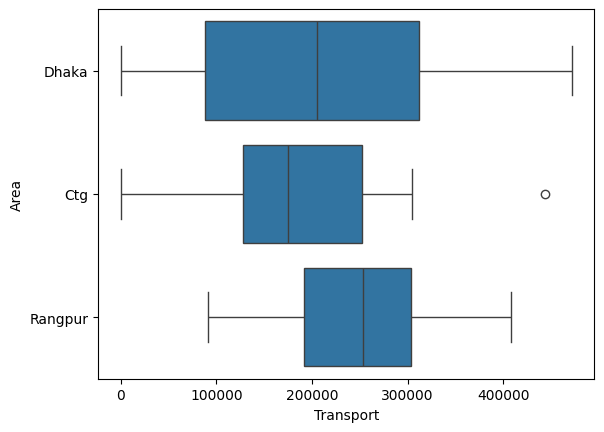

In [46]:
sns.boxplot(data = data, y =  "Area", x = "Transport",)

Text(0.5, 1.0, 'Count of Transport fare by Administration')

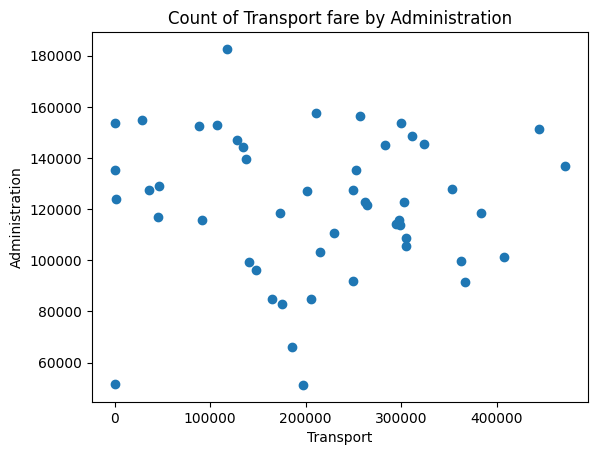

In [50]:
plt.scatter(data =data, x = "Transport", y = "Administration")
plt.xlabel("Transport")
plt.ylabel("Administration")
plt.title("Count of Transport fare by Administration")

In [51]:
data.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [61]:
data["Area"].value_counts()

Area
Dhaka    17
1        17
2        16
Name: count, dtype: int64

In [62]:
data["Area"].unique()

array(['Dhaka', 1, 2], dtype=object)

In [63]:
data["Area"] = data["Area"].replace(["Dhaka", "Ctg", "Rangpur"], [0,1,2])

C:\Users\USER\AppData\Local\Temp\ipykernel_5580\4167511213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Area"] = data["Area"].replace(["Dhaka", "Ctg", "Rangpur"], [0,1,2])


In [64]:
data["Area"]

0     0
1     1
2     2
3     0
4     2
5     0
6     1
7     2
8     0
9     1
10    2
11    1
12    2
13    1
14    2
15    0
16    1
17    0
18    2
19    0
20    1
21    0
22    2
23    2
24    0
25    1
26    2
27    0
28    2
29    0
30    2
31    0
32    1
33    2
34    1
35    0
36    2
37    1
38    0
39    1
40    1
41    2
42    1
43    0
44    1
45    0
46    2
47    1
48    0
49    1
Name: Area, dtype: int64

In [65]:
data.tail()

,Marketing Spend,Administration,Transport,Area,Profit
45,1000.23,124153.04,1903.93,0,64926.08
46,1315.46,115816.21,297114.46,2,49490.75
47,0.00,135426.92,0.00,1,42559.73
48,542.05,51743.15,0.00,0,35673.41
49,0.00,116983.80,45173.06,1,14681.40


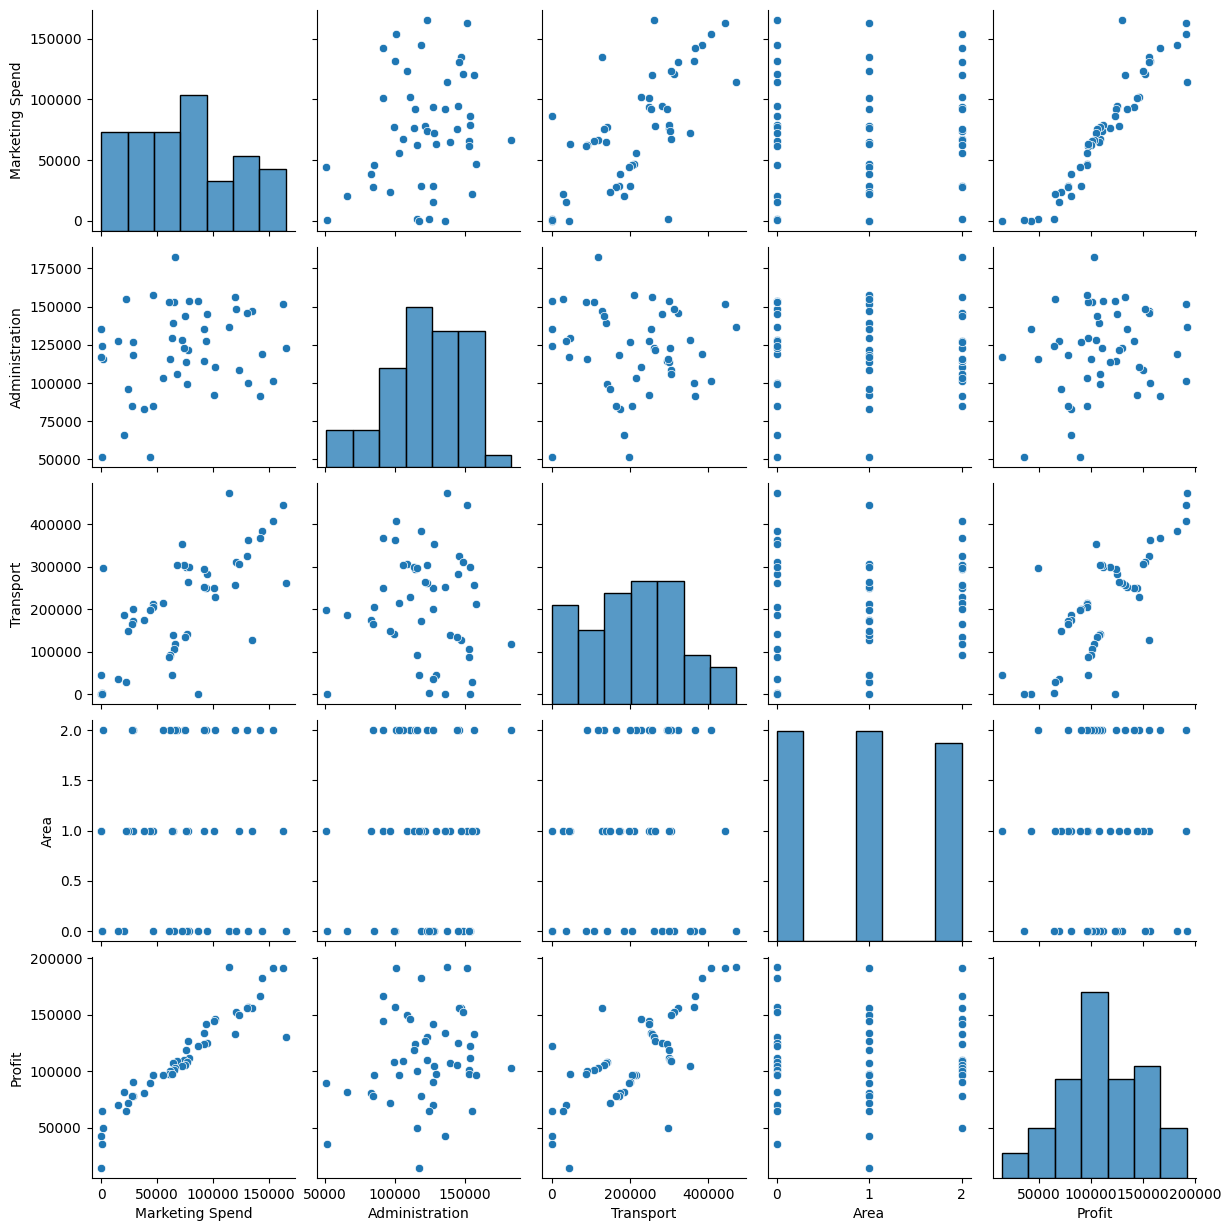

In [66]:
sns.pairplot(data)

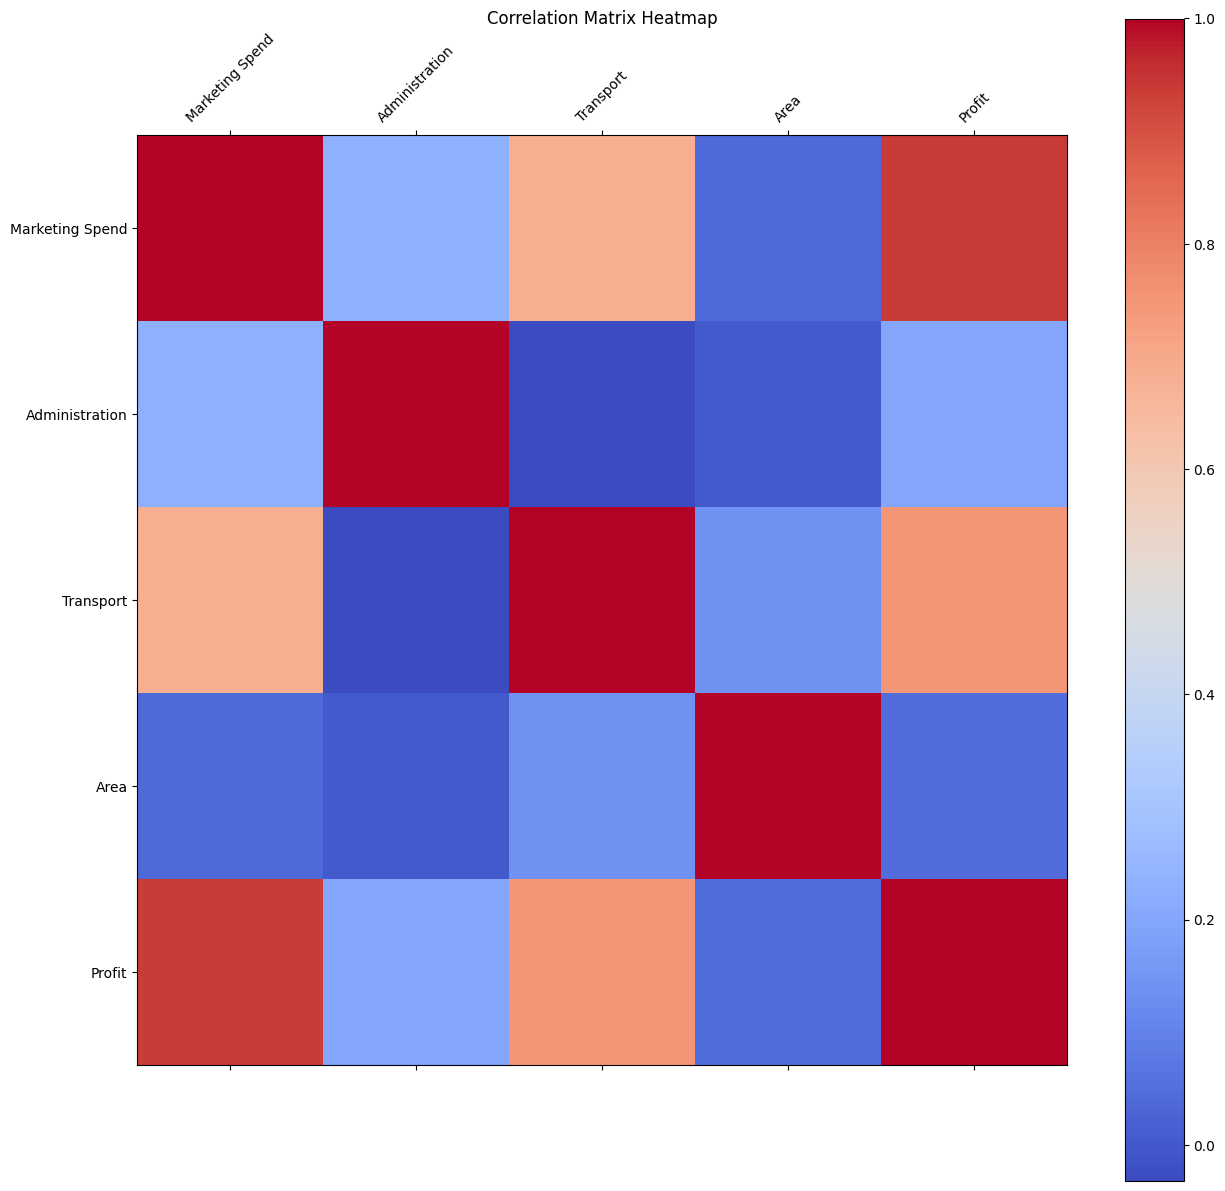

In [67]:
from matplotlib import rcParams
# Assuming df is already defined and contains your data
rcParams["figure.figsize"] = 20, 15  # Adjusted size for better visibility

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.matshow(correlation_matrix, cmap='coolwarm')  # You can change the colormap if desired

# Set ticks and labels
plt.yticks(np.arange(len(data.columns)), data.columns)
plt.xticks(np.arange(len(data.columns)), data.columns, rotation=45)  # Rotate x labels for better readability

# Add color bar
plt.colorbar()

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [87]:
 X = data.drop("Profit", axis = 1)

In [88]:
y = data.drop("Area", axis = 1)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²) score: {r2}')
print(f"Mean Absolute Error(MAE):{mae}")

Mean Squared Error (MSE): 32077618.847862653
R-squared (R²) score: 0.960387833013193
Mean Absolute Error(MAE):2307.8590531535046


In [95]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2score = r2_score(y_test, pred)

print(f"Mean Squared Error(MSE): {mse}")
print(f"Mean absolute Error(MAE):{mae}")
print(f"r2_score(Score):{r2}")


Mean Squared Error(MSE): 882899516.31703
Mean absolute Error(MAE):21776.21
r2_score(Score):0.960387833013193


In [97]:
ensemble = RandomForestRegressor()
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2score = r2_score(y_test, pred)

print(f"Mean Squared Error(MSE): {mse}")
print(f"Mean absolute Error(MAE):{mae}")
print(f"r2_score(Score):{r2}")


Mean Squared Error(MSE): 532344066.86715734
Mean absolute Error(MAE):15757.234322500004
r2_score(Score):0.960387833013193


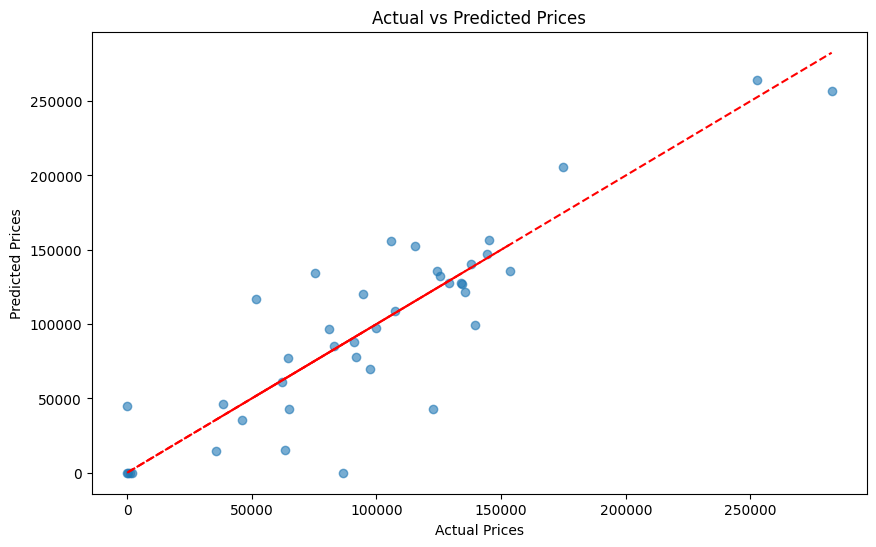

In [105]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(x=y_test, y=pred, alpha=0.6)

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labeling the plot
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Show the plot
plt.show()
